# Decision Trees and Random Forest

### Decision Trees

Hierarchical classification of data to predict outcome that is done over a single tree

This algorithm creates primary, secondary, tertiary, etc levels and based on the levels it eventually make a decision

How the algorithm splits the data is the most important idea with this kind of classification


###### Decision Tree Pros

Handles Multi-Output Problems

Simple to understand and to interpret

Works well on large datasets

Requires little data preparation if any data prep

Predictable execution time - cost of using the tree is logarithmic to the number of data points used

Whitebox - Can see the actual decision tree and statistics for each decision

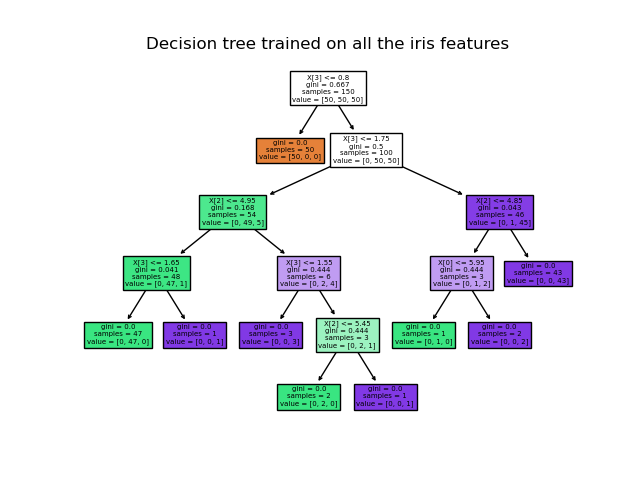

###### Decision Tree Cons

Easy to overfit the data and hard to find the right kind of dataset that works well with Decision Trees

Small variations in the data might may result in a high penalty

A single tree contains many leaves however the leaves are removed from the global perspective which can result in poor outcomes, mitigated with Random Forests

Possible for data to dominate the Decision Tree so balancing may be an option to even out the dataset
- https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704





### Get Data

Regression Dataset
https://www.kaggle.com/datasets/aaquibsiddiqui/usa-housing-dataset

Classification Dataset https://www.kaggle.com/datasets/brendan45774/test-file

### Train the Model

`from sklearn.neighbors import DecisionTreeRegressor, DecisionTreeClassifier`

###### Regression

`
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred_dtree = model.predict(X_test)
`

###### Classification

`
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred_dtree = model.predict(X_test)
`


###### See the Tree

`
from sklearn import tree
tree.plot_tree(tree_name, filled=True)
`



###### Exporting the Decision Tree

`
from sklearn import tree
model = model.fit(X_train, y_train)
tree.export_graphviz(model, out_file='output.dot')
`

###### Converting DOT file to PNG

From the Command line (outside of Jupyter Notebook)

`
brew install graphviz
dot -Tpng tree.dot -o tree.png
`



### Evaluating the Data

Regression

`
print('MAE', mean_absolute_error(y_test, pred_dtree))
print('MSE', mean_squared_error(y_test, pred_dtree))
print('RMSE', np.sqrt(mean_absolute_error(y_test, pred_dtree)))
print('Score', model.score(X_test, y_test)
`

Classification

`
print(confusion_matrix(y_test, pred_dtree))
print(classification_report(y_test, pred_dtree))
`




In [57]:

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix

from sklearn import tree





### Decision Tree Regression with Housing Data

In [54]:
df = pd.read_csv('USA_Housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [56]:
# Train Test and Split

X = df[df.columns[:-2]]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
# Instantiate, Fit and Predict our model and data

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)
pred_dtree_reg = dtree_reg.predict(X_test)

print('MAE', mean_absolute_error(y_test, pred_dtree_reg))
print('MSE', mean_squared_error(y_test, pred_dtree_reg))
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_dtree_reg)))
print('Score', dtree_reg.score(X_test, y_test))


MAE 140425.41736350718
MSE 31773988433.957687
RMSE 178252.59727128153
Score 0.730752468777895


[Text(0.47022785342841383, 0.9821428571428571, 'X[0] <= 67350.699\nsquared_error = 127470533878.02\nsamples = 3500\nvalue = 1228219.149'),
 Text(0.20929044976635514, 0.9464285714285714, 'X[1] <= 6.018\nsquared_error = 90648472609.957\nsamples = 1558\nvalue = 1020478.871'),
 Text(0.08958148364485981, 0.9107142857142857, 'X[4] <= 33565.334\nsquared_error = 72053815971.475\nsamples = 822\nvalue = 886683.011'),
 Text(0.031998182762201455, 0.875, 'X[0] <= 55903.318\nsquared_error = 62771308466.862\nsamples = 340\nvalue = 753240.131'),
 Text(0.011146417445482866, 0.8392857142857143, 'X[4] <= 26357.622\nsquared_error = 38810856020.216\nsamples = 85\nvalue = 535583.349'),
 Text(0.0053416407061266874, 0.8035714285714286, 'X[0] <= 51150.795\nsquared_error = 31838824626.684\nsamples = 39\nvalue = 427588.895'),
 Text(0.0020103842159916925, 0.7678571428571429, 'X[4] <= 20322.625\nsquared_error = 20161370497.914\nsamples = 19\nvalue = 318087.866'),
 Text(0.0005316718587746625, 0.7321428571428571, 'X

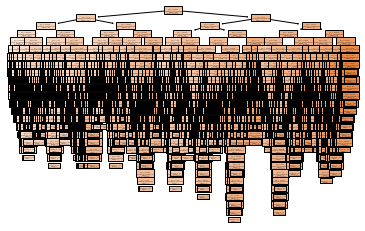

In [59]:
# That's great, now what exactly did the model actually do?


tree.plot_tree(dtree_reg, filled=True)

### Decision Tree Classification with Titanic Dataset

In [64]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
# Let's clean this up


# Fill in NAN for Age
def update_age(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        if pclass == 1:
            return 41
        if pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

df['Age'] = df[['Age','Pclass']].apply(update_age, axis=1)



# Update Nan on line 152
df['Fare'].loc[152] = 12.46



# Split the Embarked and PClass Columns
emb = pd.get_dummies(df['Embarked'], drop_first=True)
pclass = pd.get_dummies(df['Pclass'], drop_first=True)
pclass = pclass.rename({2:'P2', 3:'P3'}, axis=1)
df = pd.concat([df, emb, pclass], axis=1)


# Drop the unnnecessary colums
df = df.drop(['PassengerId', 'Name', 'Pclass', 'Ticket', 'Cabin', 'Embarked', 'Sex'], axis=1)
df.head()


/var/folders/l_/qm4dplj969j0tcpycqgttbwc0000gn/T/ipykernel_79106/2583623621.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'].loc[152] = 12.46


,Survived,Age,SibSp,Parch,Fare,Q,S,P2,P3
0,0,34.5,0,0,7.8292,1,0,0,1
1,1,47.0,1,0,7.0000,0,1,0,1
2,0,62.0,0,0,9.6875,1,0,1,0
3,0,27.0,0,0,8.6625,0,1,0,1
4,1,22.0,1,1,12.2875,0,1,0,1


In [66]:
# Train test Split

X = df[df.columns[1:]]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)




In [67]:
# Instantiate, fit and predict the model and data


dtree_class = DecisionTreeClassifier()
dtree_class.fit(X_train, y_train)
pred_dtree_class = dtree_class.predict(X_test)

print('Mean', np.mean(y_test != pred_dtree_class))
print(confusion_matrix(y_test, pred_dtree_class))
print(classification_report(y_test, pred_dtree_class))



Mean 0.42063492063492064
[[60 25]
 [28 13]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69        85
           1       0.34      0.32      0.33        41

    accuracy                           0.58       126
   macro avg       0.51      0.51      0.51       126
weighted avg       0.57      0.58      0.58       126



[Text(0.5463966836734694, 0.9666666666666667, 'X[3] <= 15.373\ngini = 0.471\nsamples = 292\nvalue = [181, 111]'),
 Text(0.33705357142857145, 0.9, 'X[4] <= 0.5\ngini = 0.394\nsamples = 152\nvalue = [111, 41]'),
 Text(0.2557397959183674, 0.8333333333333334, 'X[1] <= 0.5\ngini = 0.331\nsamples = 124\nvalue = [98, 26]'),
 Text(0.15433673469387754, 0.7666666666666667, 'X[0] <= 23.5\ngini = 0.276\nsamples = 103\nvalue = [86, 17]'),
 Text(0.08163265306122448, 0.7, 'X[0] <= 22.75\ngini = 0.422\nsamples = 33\nvalue = [23, 10]'),
 Text(0.061224489795918366, 0.6333333333333333, 'X[3] <= 9.156\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(0.05102040816326531, 0.5666666666666667, 'X[0] <= 18.25\ngini = 0.434\nsamples = 22\nvalue = [15, 7]'),
 Text(0.02040816326530612, 0.5, 'X[0] <= 12.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.01020408163265306, 0.43333333333333335, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.030612244897959183, 0.43333333333333335, 'X[3] <= 8.356\ngini 

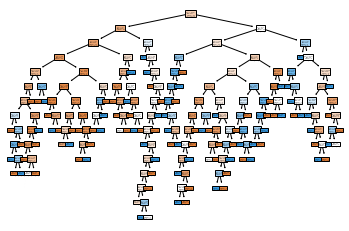

In [68]:
# Let's look at the decision tree itself


tree.plot_tree(dtree_class, filled=True)

In [69]:
# Export the tree


tree.export_graphviz(dtree_class, out_file='dtree_class.out')


# Random Forest

Think of this as multiple Decision Trees at the same time time and the best outcome being presented

Hierarchical classification of data to predict outcome that is done over `n` number of trees and the best result is presented

It's not be the be combination of the trees that are presented but the best tree in general

### Pros
Handles Multi-Output Problems

Works well with non-linear data.

Lower risk of overfitting.

Runs efficiently on a large dataset.

Better accuracy than other classification algorithms.

### Cons

Random forests are found to be biased while dealing with categorical variables.

Slow Training

Not suitable for linear methods with a lot of sparse features

Black Box - data is not transparent

### Getting Started

Regression Dataset https://www.kaggle.com/datasets/aaquibsiddiqui/usa-housing-dataset

Classification Dataset https://www.kaggle.com/datasets/brendan45774/test-file

### Train the Model

`from sklearn.ensemble import RandomForestClassifier`


###### Regression

`
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred_dtree = model.predict(X_test)
`

###### Classification

`
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred_dtree = model.predict(X_test)
`

###### Tuning

Random Forest be default will create 100 tress, and this number can be increased or decreased

The number of trees doens't matter because each execution will produce random results

No way to manually select the best tree

Only paramter to run is the `n_estimators` to increase the number of trees created, thereby possibly getting a better result

### Evaluating

Regression
`
print('MAE', mean_absolute_error(y_test, pred_dtree))
print('MSE', mean_squared_error(y_test, pred_dtree))
print('RMSE', np.sqrt(mean_absolute_error(y_test, pred_dtree)))
print('Score', model.score(X_test, y_test)
`

Classification

`
print(confusion_matrix(y_test, pred_dtree))
print(classification_report(y_test, pred_dtree))
`




In [71]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### Random Forest Regression with USA Housing dataset

In [70]:
df = pd.read_csv('USA_Housing.csv')
# df.info()

X = df[df.columns[:-2]]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [73]:
# Instantiate our model and predict

rfc_reg = RandomForestRegressor(n_estimators=300)
rfc_reg.fit(X_train, y_train)
pred_rfc_reg = rfc_reg.predict(X_test)


print('MAE', mean_absolute_error(y_test, pred_rfc_reg))
print('MSE', mean_squared_error(y_test, pred_rfc_reg))
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_rfc_reg)))
print('Score', rfc_reg.score(X_test, y_test))



MAE 94213.65433630651
MSE 14147273850.143328
RMSE 118942.31311918954
Score 0.8801183375014


### Random Forest Classification with Titanic Dataset

In [74]:
df = pd.read_csv('Titanic.csv')

def update_age(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        if pclass == 1:
            return 41
        if pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

df['Age'] = df[['Age','Pclass']].apply(update_age, axis=1)



# Update Nan on line 152
df['Fare'].loc[152] = 12.46



# Split the Embarked and PClass Columns
emb = pd.get_dummies(df['Embarked'], drop_first=True)
pclass = pd.get_dummies(df['Pclass'], drop_first=True)
pclass = pclass.rename({2:'P2', 3:'P3'}, axis=1)
df = pd.concat([df, emb, pclass], axis=1)


# Drop the unnnecessary colums
df = df.drop(['PassengerId', 'Name', 'Pclass', 'Ticket', 'Cabin', 'Embarked', 'Sex'], axis=1)
df.head()

X = df[df.columns[1:]]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


/var/folders/l_/qm4dplj969j0tcpycqgttbwc0000gn/T/ipykernel_79106/4113336774.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'].loc[152] = 12.46


In [83]:
rfc_class = RandomForestClassifier(n_estimators=500)
rfc_class.fit(X_train, y_train)
pred_rfc_class = rfc_class.predict(X_test)

print('Mean', np.mean(y_test != pred_rfc_class))
print(confusion_matrix(y_test, pred_rfc_class))
print(classification_report(y_test, pred_rfc_class))


Mean 0.29365079365079366
[[70 15]
 [22 19]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        85
           1       0.56      0.46      0.51        41

    accuracy                           0.71       126
   macro avg       0.66      0.64      0.65       126
weighted avg       0.70      0.71      0.70       126

